In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#import model packages
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, roc_auc_score, f1_score, roc_curve, r2_score


In [2]:
# import pickle
df_baseline = pd.read_pickle('data_strube/pickles/df_merge_weatherloc_dev_stage.pkl')

In [3]:
df_baseline.head()

,betaine_nir,cry_nir,csy_nir,dm_nir,fieldid,region,invert_nir,mark_nir,ms_comp,obj,...,wind_direction_devstage_3,wind_speed_avg_devstage_1,wind_speed_avg_devstage_2,wind_speed_avg_devstage_3,wind_speed_gusts_devstage_1,wind_speed_gusts_devstage_2,wind_speed_gusts_devstage_3,wind_speed_max_devstage_1,wind_speed_max_devstage_2,wind_speed_max_devstage_3
0,0.1551,54.60,8.838976,21.5439,Emmeloord,Niederlande,0.1769,5.3553,2,23,...,162.221843,2.899709,1.797241,1.1,5.343605,3.870664,2.951536,3.606541,2.293074,1.495336
1,0.1502,51.07,8.493911,21.8552,Emmeloord,Niederlande,0.1539,5.2233,6,3,...,162.221843,2.899709,1.797241,1.1,5.343605,3.870664,2.951536,3.606541,2.293074,1.495336
2,0.1370,52.73,8.356650,21.1878,Emmeloord,Niederlande,0.1643,5.3398,2,28,...,162.221843,2.899709,1.797241,1.1,5.343605,3.870664,2.951536,3.606541,2.293074,1.495336
3,0.1391,44.33,6.957815,21.1140,Emmeloord,Niederlande,0.1647,5.4185,1,33,...,162.221843,2.899709,1.797241,1.1,5.343605,3.870664,2.951536,3.606541,2.293074,1.495336
4,0.1286,50.00,7.835800,20.8531,Emmeloord,Niederlande,0.1615,5.1815,2,7,...,162.221843,2.899709,1.797241,1.1,5.343605,3.870664,2.951536,3.606541,2.293074,1.495336


In [4]:
df_baseline.shape

(8768, 178)

In [5]:
# categorize region and station_location
df_baseline[['region', 'station_location']] = df_baseline[['region', 'station_location']].astype('category')

In [6]:
df_baseline['region_cat'] = df_baseline['region'].cat.codes
df_baseline['statloc_cat'] = df_baseline['station_location'].cat.codes

In [7]:
# drop highly correlated features, unnecessary columns and categorical columns
df_baseline.drop(['betaine_nir', 'cry_nir', 'dm_nir', 'invert_nir', 'mark_nir', 'sc_nir', 'totaln_nir','fieldid', 'region', 'station_location', 'seriesid', 'x', 'y','ms_comp', 'obj', 'otype_comp', 'pollinator_comp','region_cat', 'statloc_cat'], axis=1, inplace=True)

In [8]:
df_baseline.columns

Index(['csy_nir', 'seednames_coded', 'air_temperature_avg_devstage_1',
       'air_temperature_avg_devstage_2', 'air_temperature_avg_devstage_3',
       'air_temperature_max_devstage_1', 'air_temperature_max_devstage_2',
       'air_temperature_max_devstage_3', 'air_temperature_min_devstage_1',
       'air_temperature_min_devstage_2',
       ...
       'wind_direction_devstage_3', 'wind_speed_avg_devstage_1',
       'wind_speed_avg_devstage_2', 'wind_speed_avg_devstage_3',
       'wind_speed_gusts_devstage_1', 'wind_speed_gusts_devstage_2',
       'wind_speed_gusts_devstage_3', 'wind_speed_max_devstage_1',
       'wind_speed_max_devstage_2', 'wind_speed_max_devstage_3'],
      dtype='object', length=161)

In [9]:
df_baseline.head()

,csy_nir,seednames_coded,air_temperature_avg_devstage_1,air_temperature_avg_devstage_2,air_temperature_avg_devstage_3,air_temperature_max_devstage_1,air_temperature_max_devstage_2,air_temperature_max_devstage_3,air_temperature_min_devstage_1,air_temperature_min_devstage_2,...,wind_direction_devstage_3,wind_speed_avg_devstage_1,wind_speed_avg_devstage_2,wind_speed_avg_devstage_3,wind_speed_gusts_devstage_1,wind_speed_gusts_devstage_2,wind_speed_gusts_devstage_3,wind_speed_max_devstage_1,wind_speed_max_devstage_2,wind_speed_max_devstage_3
0,8.838976,85,9.86423,16.986667,16.63934,10.311323,17.47545,17.161149,9.43064,16.512095,...,162.221843,2.899709,1.797241,1.1,5.343605,3.870664,2.951536,3.606541,2.293074,1.495336
1,8.493911,1204,9.86423,16.986667,16.63934,10.311323,17.47545,17.161149,9.43064,16.512095,...,162.221843,2.899709,1.797241,1.1,5.343605,3.870664,2.951536,3.606541,2.293074,1.495336
2,8.356650,90,9.86423,16.986667,16.63934,10.311323,17.47545,17.161149,9.43064,16.512095,...,162.221843,2.899709,1.797241,1.1,5.343605,3.870664,2.951536,3.606541,2.293074,1.495336
3,6.957815,1142,9.86423,16.986667,16.63934,10.311323,17.47545,17.161149,9.43064,16.512095,...,162.221843,2.899709,1.797241,1.1,5.343605,3.870664,2.951536,3.606541,2.293074,1.495336
4,7.835800,95,9.86423,16.986667,16.63934,10.311323,17.47545,17.161149,9.43064,16.512095,...,162.221843,2.899709,1.797241,1.1,5.343605,3.870664,2.951536,3.606541,2.293074,1.495336


In [10]:
columnlist = df_baseline.columns.to_list()

In [11]:
columnlist

['csy_nir',
 'seednames_coded',
 'air_temperature_avg_devstage_1',
 'air_temperature_avg_devstage_2',
 'air_temperature_avg_devstage_3',
 'air_temperature_max_devstage_1',
 'air_temperature_max_devstage_2',
 'air_temperature_max_devstage_3',
 'air_temperature_min_devstage_1',
 'air_temperature_min_devstage_2',
 'air_temperature_min_devstage_3',
 'deltat_avg_devstage_1',
 'deltat_avg_devstage_2',
 'deltat_avg_devstage_3',
 'deltat_max_devstage_1',
 'deltat_max_devstage_2',
 'deltat_max_devstage_3',
 'deltat_min_devstage_1',
 'deltat_min_devstage_2',
 'deltat_min_devstage_3',
 'dew_point_avg_devstage_1',
 'dew_point_avg_devstage_2',
 'dew_point_avg_devstage_3',
 'dew_point_min_devstage_1',
 'dew_point_min_devstage_2',
 'dew_point_min_devstage_3',
 'eag_soil_moisture_1_devstage_1',
 'eag_soil_moisture_1_devstage_2',
 'eag_soil_moisture_1_devstage_3',
 'eag_soil_moisture_2_devstage_1',
 'eag_soil_moisture_2_devstage_2',
 'eag_soil_moisture_2_devstage_3',
 'eag_soil_moisture_3_devstage_1',


In [12]:
locationdroplist = [
 'deltat_avg_devstage_1',
 'deltat_avg_devstage_2',
 'deltat_avg_devstage_3',
 'deltat_max_devstage_1',
 'deltat_max_devstage_2',
 'deltat_max_devstage_3',
 'deltat_min_devstage_1',
 'deltat_min_devstage_2',
 'deltat_min_devstage_3',
 'dew_point_avg_devstage_1',
 'dew_point_avg_devstage_2',
 'dew_point_avg_devstage_3',
 'dew_point_min_devstage_1',
 'dew_point_min_devstage_2',
 'dew_point_min_devstage_3',
 'eag_soil_moisture_1_devstage_1',
 'eag_soil_moisture_1_devstage_2',
 'eag_soil_moisture_1_devstage_3',
 'eag_soil_moisture_2_devstage_1',
 'eag_soil_moisture_2_devstage_2',
 'eag_soil_moisture_2_devstage_3',
 'eag_soil_moisture_3_devstage_1',
 'eag_soil_moisture_3_devstage_2',
 'eag_soil_moisture_3_devstage_3',
 'eag_soil_moisture_4_devstage_1',
 'eag_soil_moisture_4_devstage_2',
 'eag_soil_moisture_4_devstage_3',
 'eag_soil_moisture_5_devstage_1',
 'eag_soil_moisture_5_devstage_2',
 'eag_soil_moisture_5_devstage_3',
 'eag_soil_moisture_6_devstage_1',
 'eag_soil_moisture_6_devstage_2',
 'eag_soil_moisture_6_devstage_3',
 'et0_devstage_1',
 'et0_devstage_2',
 'et0_devstage_3',
 'latitude_1',
 'latitude_2',
 'latitude_3',
 'leaf_wetness_devstage_1',
 'leaf_wetness_devstage_2',
 'leaf_wetness_devstage_3',
 'longitude_1',
 'longitude_2',
 'longitude_3',
 'precipitation_devstage_1',
 'precipitation_devstage_2',
 'precipitation_devstage_3',
 'relative_humidity_avg_devstage_1',
 'relative_humidity_avg_devstage_2',
 'relative_humidity_avg_devstage_3',
 'relative_humidity_max_devstage_1',
 'relative_humidity_max_devstage_2',
 'relative_humidity_max_devstage_3',
 'relative_humidity_min_devstage_1',
 'relative_humidity_min_devstage_2',
 'relative_humidity_min_devstage_3',
 'saturation_vpd_avg_devstage_1',
 'saturation_vpd_avg_devstage_2',
 'saturation_vpd_avg_devstage_3',
 'saturation_vpd_min_devstage_1',
 'saturation_vpd_min_devstage_2',
 'saturation_vpd_min_devstage_3',
 'soil_salinity_1_devstage_1',
 'soil_salinity_1_devstage_2',
 'soil_salinity_1_devstage_3',
 'soil_salinity_2_devstage_1',
 'soil_salinity_2_devstage_2',
 'soil_salinity_2_devstage_3',
 'soil_salinity_3_devstage_1',
 'soil_salinity_3_devstage_2',
 'soil_salinity_3_devstage_3',
 'soil_salinity_4_devstage_1',
 'soil_salinity_4_devstage_2',
 'soil_salinity_4_devstage_3',
 'soil_salinity_5_devstage_1',
 'soil_salinity_5_devstage_2',
 'soil_salinity_5_devstage_3',
 'soil_salinity_6_devstage_1',
 'soil_salinity_6_devstage_2',
 'soil_salinity_6_devstage_3',
 'soil_temperature_1_max_devstage_1',
 'soil_temperature_1_max_devstage_2',
 'soil_temperature_1_max_devstage_3',
 'soil_temperature_1_min_devstage_1',
 'soil_temperature_1_min_devstage_2',
 'soil_temperature_1_min_devstage_3',
 'soil_temperature_1_vg_devstage_1',
 'soil_temperature_1_vg_devstage_2',
 'soil_temperature_1_vg_devstage_3',
 'soil_temperature_2_max_devstage_1',
 'soil_temperature_2_max_devstage_2',
 'soil_temperature_2_max_devstage_3',
 'soil_temperature_2_min_devstage_1',
 'soil_temperature_2_min_devstage_2',
 'soil_temperature_2_min_devstage_3',
 'soil_temperature_2_vg_devstage_1',
 'soil_temperature_2_vg_devstage_2',
 'soil_temperature_2_vg_devstage_3',
 'soil_temperature_3_max_devstage_1',
 'soil_temperature_3_max_devstage_2',
 'soil_temperature_3_max_devstage_3',
 'soil_temperature_3_min_devstage_1',
 'soil_temperature_3_min_devstage_2',
 'soil_temperature_3_min_devstage_3',
 'soil_temperature_3_vg_devstage_1',
 'soil_temperature_3_vg_devstage_2',
 'soil_temperature_3_vg_devstage_3',
 'soil_temperature_4_max_devstage_1',
 'soil_temperature_4_max_devstage_2',
 'soil_temperature_4_max_devstage_3',
 'soil_temperature_4_min_devstage_1',
 'soil_temperature_4_min_devstage_2',
 'soil_temperature_4_min_devstage_3',
 'soil_temperature_4_vg_devstage_1',
 'soil_temperature_4_vg_devstage_2',
 'soil_temperature_4_vg_devstage_3',
 'soil_temperature_5_max_devstage_1',
 'soil_temperature_5_max_devstage_2',
 'soil_temperature_5_max_devstage_3',
 'soil_temperature_5_min_devstage_1',
 'soil_temperature_5_min_devstage_2',
 'soil_temperature_5_min_devstage_3',
 'soil_temperature_5_vg_devstage_1',
 'soil_temperature_5_vg_devstage_2',
 'soil_temperature_5_vg_devstage_3',
 'soil_temperature_6_max_devstage_1',
 'soil_temperature_6_max_devstage_2',
 'soil_temperature_6_max_devstage_3',
 'soil_temperature_6_min_devstage_1',
 'soil_temperature_6_min_devstage_2',
 'soil_temperature_6_min_devstage_3',
 'soil_temperature_6_vg_devstage_1',
 'soil_temperature_6_vg_devstage_2',
 'soil_temperature_6_vg_devstage_3',
 'solar_radiation_devstage_1',
 'solar_radiation_devstage_2',
 'solar_radiation_devstage_3',
 'wind_direction_devstage_1',
 'wind_direction_devstage_2',
 'wind_direction_devstage_3',
 'wind_speed_avg_devstage_1',
 'wind_speed_avg_devstage_2',
 'wind_speed_avg_devstage_3',
 'wind_speed_gusts_devstage_1',
 'wind_speed_gusts_devstage_2',
 'wind_speed_gusts_devstage_3',
 'wind_speed_max_devstage_1',
 'wind_speed_max_devstage_2',
 'wind_speed_max_devstage_3'
#   'air_temperature_max_devstage_1',
#  'air_temperature_max_devstage_2',
#  'air_temperature_max_devstage_3',
#  'air_temperature_min_devstage_1',
#  'air_temperature_min_devstage_2',
#  'air_temperature_min_devstage_3',
# 'air_temperature_avg_devstage_1',
# 'air_temperature_avg_devstage_2',
# 'air_temperature_avg_devstage_3'
]

In [13]:
df_baseline.drop(locationdroplist, axis = 1, inplace = True)

In [14]:
df_baseline.shape

(8768, 11)

<AxesSubplot:>

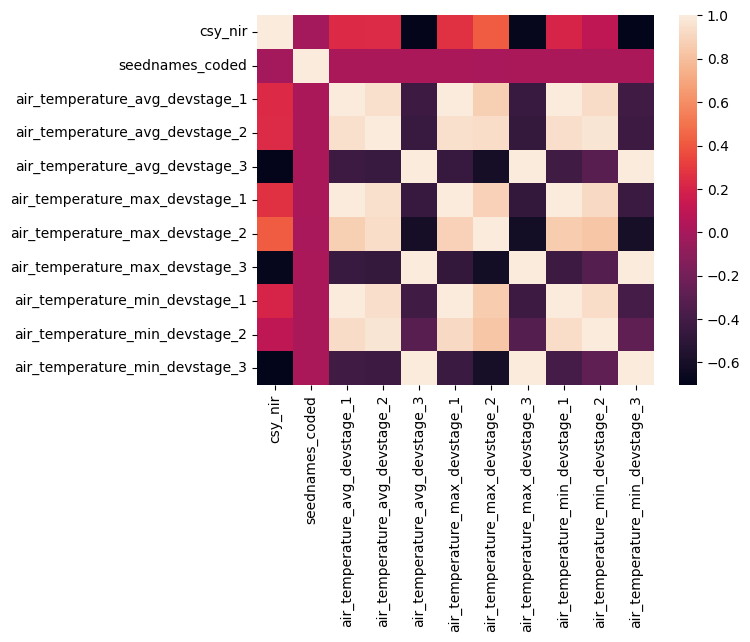

In [15]:
sns.heatmap(df_baseline.corr())

In [16]:
# define X and y
X = df_baseline.drop('csy_nir', axis=1)
y = df_baseline['csy_nir']
print(f"We have {X.shape[0]} observations in our dataset and {X.shape[1]} features")
print(f"Our target vector has also {y.shape[0]} values")

We have 8768 observations in our dataset and 10 features
Our target vector has also 8768 values


In [17]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# instantiate model
baseline_linreg = LinearRegression()

# fit model
baseline_linreg.fit(X_train, y_train)

LinearRegression()

In [19]:
# predict sugarcontent of trian and test-set
y_train_pred = baseline_linreg.predict(X_train)
baseline_pred = baseline_linreg.predict(X_test)


In [20]:
# Mean Squared Error
print('MSE Lin Reg Train:\n', mean_squared_error(y_train, y_train_pred))
print('MSE Lin Reg Test:\n', mean_squared_error(y_test, baseline_pred))

# Root Mean Squared Error
print('RMSE Lin Reg Train:\n', mean_squared_error(y_train, y_train_pred, squared = False))
print('RMSE Lin Reg Test:\n', mean_squared_error(y_test, baseline_pred, squared = False))

# R^2 Score
print('R^2 Lin Reg Train:\n', r2_score(y_train, y_train_pred))
print('R^2 Lin Reg Test:\n', r2_score(y_test, baseline_pred))

MSE Lin Reg Train:
 1.2720811432107069
MSE Lin Reg Test:
 1.1946567063434286
RMSE Lin Reg Train:
 1.1278657469799793
RMSE Lin Reg Test:
 1.0930035253115282
R^2 Lin Reg Train:
 0.691770592820133
R^2 Lin Reg Test:
 0.7115895213461803


In [21]:
def error_analysis(y_test, y_pred):
    """Generated true vs. predicted values and residual scatter plot for models
    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """
    # Calculate residuals
    residuals = y_test - y_pred
    # Plot real vs. predicted values
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    ax[0].scatter(y_pred, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    ax[0].set_xlim((y_pred.min()-2.5), (y_pred.max()+2.5))
    ax[0].set_ylim((residuals.min()-1), (residuals.max()+20))
    ax[1].scatter(y_pred, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    ax[1].set_xlim((y_pred.min()-2.5), (y_pred.max()+2.5))
    ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

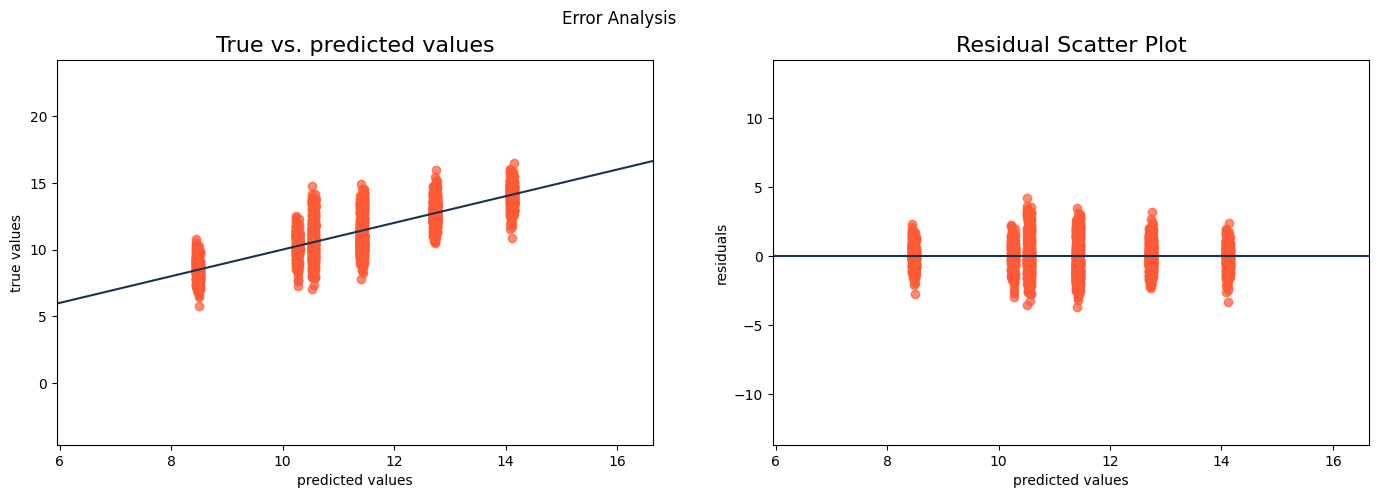

In [22]:
error_analysis(y_test,baseline_pred)